1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigenvalues Covariance:
[2.98306581e+01+0.j 1.99593053e+00+0.j 5.36515460e-16+0.j]
Eigenvectors Covariance:
[[-0.11927846  0.56489466 -0.81649658]
 [-0.57257338 -0.71098035 -0.40824829]
 [-0.8111303   0.41880898  0.40824829]]

Eigenvalues SVD:
[2.98579302e+01 1.99635637e+00 4.88231172e-31]
Eigenvectors SVD:
[[-0.11920933  0.56490926 -0.81649658]
 [-0.57266039 -0.71091027 -0.40824829]
 [-0.81107905  0.41890824  0.40824829]]

The two procedures give the same result for two eigenvalues

The percentual of dataset variability is: 99.99999999999999%


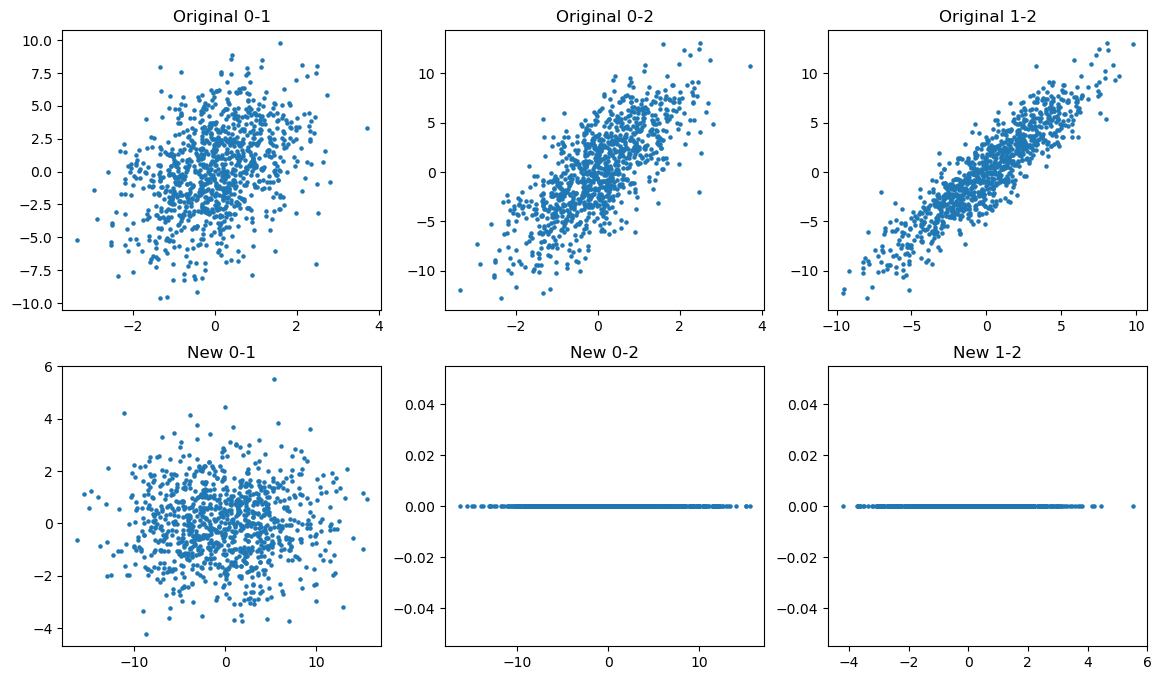

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

#-->1<-- creo i 3 dataset
N=1000
x1 = np.random.normal(loc=0, scale=1, size=N)
x2 = x1 + np.random.normal(loc=0, scale=3, size=N)
x3 = 2*x1 + x2
dataset = np.vstack((x1,x2,x3))

#-->2<-- 
matr_cov = np.cov(dataset)
#autovalori e autovettori COV-Matrix ordinati
eigen_vals_cov, eigen_vecs_cov = la.eig(matr_cov)
index = eigen_vals_cov.argsort()[::-1]
eigen_vals_cov = eigen_vals_cov[index]
eigen_vecs_cov = eigen_vecs_cov[:,index]

#-->3<--
U, S, V = la.svd(dataset) 

#autovalori SVD ordinati
eigen_vals_svd = S**2/(N-1)
i = eigen_vals_svd.argsort()[::-1]
eigen_vals_svd = eigen_vals_svd[i]
#autovettori SVD ordinati
eigen_vecs_svd = U
eigen_vecs_svd = eigen_vecs_svd[:,i]

print(f"Eigenvalues Covariance:\n{eigen_vals_cov}")
print(f"Eigenvectors Covariance:\n{eigen_vecs_cov}")

print(f"\nEigenvalues SVD:\n{eigen_vals_svd}")
print(f"Eigenvectors SVD:\n{eigen_vecs_svd}")

#Le due procedure danno lo stesso risultato per i primi due autovalori
print("\nThe two procedures give the same result for two eigenvalues")

#-->3<--
var = np.real(np.sum(eigen_vals_cov[:2])/np.sum(eigen_vals_cov))*100
print(f"\nThe percentual of dataset variability is: {var}%")


#-->4<--
eigen_vecs_cov_pca = eigen_vecs_cov[:,:2]
data_pca = np.dot(eigen_vecs_cov_pca.T, dataset)
data_pca = np.vstack([data_pca, np.zeros((1, N))]) 
#print(data_pca)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes

ax01.scatter(dataset[0], dataset[1], s= 5)
ax01.set_title('Original 0-1')
ax02.scatter(dataset[0], dataset[2], s= 5)
ax02.set_title('Original 0-2')
ax03.scatter(dataset[1], dataset[2], s= 5)
ax03.set_title('Original 1-2')

ax11.scatter(data_pca[0], data_pca[1], s= 5)
ax11.set_title('New 0-1')
ax12.scatter(data_pca[0], data_pca[2], s= 5)
ax12.set_title('New 0-2')
ax13.scatter(data_pca[1], data_pca[2], s= 5)
ax13.set_title('New 1-2')

plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [4]:
#creo il rumore con una deviazione standard pari a 1/20
noise=[]
for i in range(10):
    noise.append(np.random.normal(loc=0, scale=1/20, size=N))

#aggiungo il rumore al dataset originalmente creato (dataset)
data_n = np.vstack([dataset, noise[0], noise[1], noise[2], noise[3], noise[4], noise[5], noise[6], noise[7], noise[8], noise[9]])

#rifaccio i conti uguali a prima (aggiungo N di noise ad ogni variabile)
matr_covN = np.cov(data_n)
eigen_vals_covN, eigen_vecs_covN = np.linalg.eig(matr_covN)

#-->3<--
UN, SN, VN = np.linalg.svd(data_n) 

#autovalori
eigen_vals_svdN = SN**2/(N-1)
#autovettori
eigen_vecs_svdN = UN

print(f"Eigenvalues Covariance with Noise:\n{eigen_vals_covN}")
print(f"Eigenvectors Covariance with Noise:\n{eigen_vecs_covN}")

print(f"\nEigenvalues SVD with Noise:\n{eigen_vals_svdN}")
print(f"Eigenvectors SVD with Noise:\n{eigen_vecs_svdN}")

#print("\nThe two procedures give the same result for two eigenvalues")

eigen_vecs_cov_pcaN = eigen_vecs_covN[:,:2]
data_pcN = np.dot(eigen_vecs_cov_pcaN.T, data_n)
data_pcN = np.vstack([data_pcN, np.zeros((1, N))]) 
print(data_pcN)

Eigenvalues Covariance with Noise:
[ 2.98306827e+01  1.99594484e+00 -1.48888994e-17  2.99629286e-03
  2.86699914e-03  2.72657949e-03  2.64765647e-03  2.44499790e-03
  2.04009764e-03  2.12083659e-03  2.20946253e-03  2.27662901e-03
  2.26963971e-03]
Eigenvectors Covariance with Noise:
[[-1.19278356e-01 -5.64892810e-01  8.16496581e-01  1.68928194e-04
  -6.15217564e-04  1.22554714e-03 -4.11631176e-05 -1.31291401e-04
  -3.44768943e-05 -3.10759712e-04 -5.53058440e-05  1.88801766e-04
  -2.37610113e-04]
 [-5.72573218e-01  7.10976971e-01  4.08248290e-01 -1.03974028e-04
   1.23302282e-03 -1.63412485e-03  1.19446972e-04  3.74012459e-04
  -2.26863255e-04  4.78744984e-04  2.84278945e-04 -2.62833557e-04
   4.51998865e-04]
 [-8.11129929e-01 -4.18808648e-01 -4.08248290e-01  2.33882361e-04
   2.58768840e-06  8.16969432e-04  3.71207368e-05  1.11429656e-04
  -2.95817043e-04 -1.42774440e-04  1.73667257e-04  1.14769975e-04
  -2.32213615e-05]
 [ 1.24953593e-04  3.17768224e-05  9.85712244e-16  2.89079460e-01

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [1]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2022-12-30 10:54:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252, 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: ‘data/magic04.data’

magic04.data        100%[===================>]   1.41M   560KB/s    in 2.6s    

2022-12-30 10:54:20 (560 KB/s) - ‘data/magic04.data’ saved [1477391/1477391]



Eigenvalues Covariance:
[6.57940709e+03+0.j 3.85406143e+03+0.j 2.01648128e+03+0.j
 1.32681867e+03+0.j 6.10218593e+02+0.j 4.33618554e+02+0.j
 1.17335954e+02+0.j 8.64007193e-02+0.j 1.07368268e-02+0.j
 3.85330787e-04+0.j]
Eigenvectors Covariance:
[[ 3.27831566e-01  1.34391257e-01 -6.54919335e-02 -8.63984924e-01
  -9.45486785e-02 -1.98590747e-02  3.38166047e-01  3.99908190e-03
  -4.54855335e-04  4.57009104e-05]
 [ 1.13818908e-01  5.38781071e-02  1.90004002e-02 -3.19763260e-01
   1.97550122e-02  2.32607173e-02 -9.38308008e-01  1.33846960e-02
   6.74914234e-04 -5.73082482e-05]
 [ 3.06095229e-03 -6.59527755e-04 -1.05914677e-03 -6.93020544e-03
  -2.65186570e-03  1.33537798e-04 -1.08822564e-02 -9.27766268e-01
  -3.72227209e-01  2.26325035e-02]
 [-9.27207133e-04  2.58262608e-04  5.10330302e-04  2.60551065e-03
   1.53901245e-03 -3.47117394e-05  3.06281191e-03  3.22018741e-01
  -7.69225390e-01  5.51884502e-01]
 [-5.21959171e-04  1.52747029e-04  2.94589142e-04  1.51272408e-03
   9.19355464e-04 -2.2

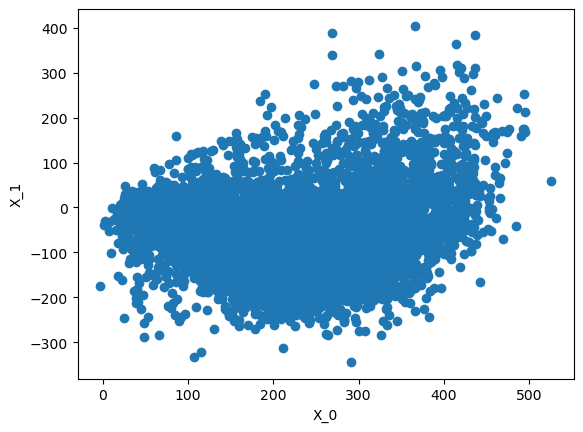

In [20]:
import csv
import pandas as pd

#leggo il file come csv
dataset = pd.read_csv("data/magic04.data")

#rimuovo la colonna "g"
dataset=dataset.drop(['g'], axis=1)

dataset = dataset.T

#autovalori e autovettori COV-Matrix ordinati come negli esercizi precedenti
matr_cov = np.cov(dataset)
eigen_vals_cov, eigen_vecs_cov = la.eig(matr_cov)
index = eigen_vals_cov.argsort()[::-1]
eigen_vals_cov = eigen_vals_cov[index]
eigen_vecs_cov = eigen_vecs_cov[:,index]

print(f"Eigenvalues Covariance:\n{eigen_vals_cov}")
print(f"Eigenvectors Covariance:\n{eigen_vecs_cov}")

#utilizzo due componenti principali
var = np.real(np.sum(eigen_vals_cov[:2])/np.sum(eigen_vals_cov))*100
print(f"\nThe percentual of dataset variability is: {var}%")

#ridefinisco
eigen_vecs_cov_pca = eigen_vecs_cov[:,:2]
data_pca = np.dot(eigen_vecs_cov_pca.T, dataset) 

#plot (2 comp) 
plt.figure()
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.scatter(data_pca[0,:], data_pca[1,:])
plt.show()